<a href="https://colab.research.google.com/github/yasarigno/NLP_DeepLearning_Course/blob/main/Exercise_Neural_Networks_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import the data from Google Drive

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [6]:
import random
random.seed(2)

import tensorflow as tf
tf.random.set_seed(2)

import numpy as np
np.random.seed(2)

In [7]:
Local = False

In [8]:
if Local:
    traffic_data = pd.read_csv('datasets/traffic_data.csv', index_col=0)
else:
    traffic_data = pd.read_csv("/content/drive/MyDrive/Shared Datasets/Traffic/traffic_data.csv", index_col=0)

The last 3 columns specify the pizza type:

Vegan
Vegetarian
Meat

In [9]:
traffic_data.head()

,day,minute,hour,second,type
0,Monday,0,8,14,traffic
1,Monday,0,8,28,traffic
2,Monday,0,8,34,traffic
3,Monday,0,8,45,traffic
4,Monday,0,8,53,traffic


# 2. EDA

In [10]:
traffic_data.shape

(85638, 5)

In [11]:
traffic_data['type'].value_counts()

no_traffic    50769
traffic       34869
Name: type, dtype: int64

Notice that the dataset is imbalanced.

In [12]:
traffic_data['day'].value_counts()

Sunday       12278
Saturday     12251
Thursday     12241
Wednesday    12237
Tuesday      12217
Monday       12212
Friday       12202
Name: day, dtype: int64

Group the types by day

In [13]:
traffic_data.groupby('day')['type'].value_counts()

day        type      
Friday     traffic        6989
           no_traffic     5213
Monday     traffic        6972
           no_traffic     5240
Saturday   no_traffic    12251
Sunday     no_traffic    12278
Thursday   traffic        6965
           no_traffic     5276
Tuesday    traffic        6990
           no_traffic     5227
Wednesday  traffic        6953
           no_traffic     5284
Name: type, dtype: int64

In [14]:
traffic_data['hour'].value_counts()

8     6211
16    6204
20    6195
18    6188
14    6180
10    6156
12    6147
15    6110
17    6076
13    6052
11    6046
21    6046
19    6036
9     5988
22       3
Name: hour, dtype: int64

Hours start at 8 and stop at 22. 
22 has very little data.

In [15]:
traffic_data['c_type'] = traffic_data['type'].apply(lambda x: 1 if x == 'traffic' else 0)

Visualisation by scatter plot

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import colorbar, figure

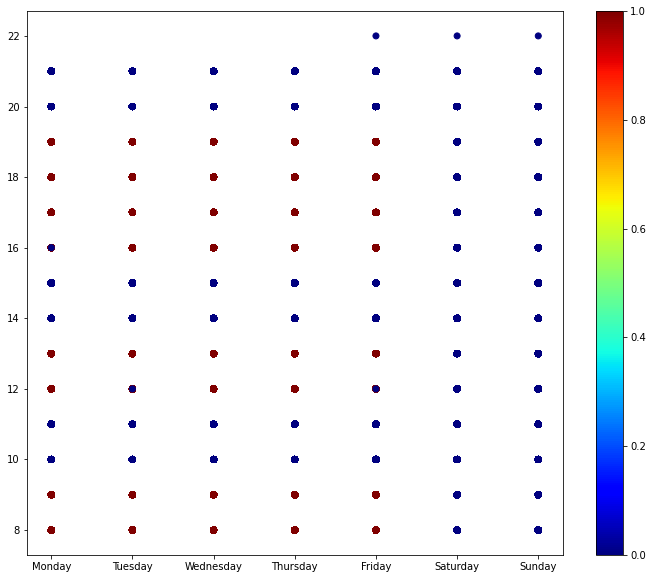

In [17]:
figure(num=None, figsize=(12, 10))
plt.scatter(
    traffic_data['day'], 
    traffic_data['hour'], 
    c=traffic_data['c_type'], 
    cmap='jet',
)
cbar = colorbar()


there is no traffic on Saturdays or Sundays. It seems to be mostly around some key hours, such as 8-10, 12-13, and 16-20.

In [18]:
traffic_data = traffic_data.join(pd.get_dummies(traffic_data['day']))

In [25]:
traffic_data

,day,minute,hour,second,type,c_type,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Monday,0,8,14,traffic,1,0,1,0,0,0,0,0
1,Monday,0,8,28,traffic,1,0,1,0,0,0,0,0
2,Monday,0,8,34,traffic,1,0,1,0,0,0,0,0
3,Monday,0,8,45,traffic,1,0,1,0,0,0,0,0
4,Monday,0,8,53,traffic,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98042,Sunday,59,17,51,no_traffic,0,0,0,0,1,0,0,0
98043,Sunday,0,18,0,no_traffic,0,0,0,0,1,0,0,0
98044,Sunday,0,16,24,no_traffic,0,0,0,0,1,0,0,0
98045,Sunday,0,16,35,no_traffic,0,0,0,0,1,0,0,0


Normalization?

In [19]:
training_dataset = traffic_data.sample(frac=0.8)
testing_dataset = traffic_data[~traffic_data.index.isin(training_dataset.index)]

In [20]:
input_columns = [
    'Monday', 
    'Tuesday', 
    'Wednesday', 
    'Thursday', 
    'Friday', 
    'Saturday', 
    'Sunday', 
    'hour', 
    'minute', 
    'second'
]

We have to build a network with more layers, as the function that needs to fit this data is now more complex.

---

There is no hard and fast rule for the number of layers or neurons, but it is useful to think about the networks like this:

- If you add a layer with more neurons than the previous layer or the input, you add more information into the network. More neurons create more signals for the next layer.

- If you add a layer with fewer neurons than the previous layer or the input, you compress information. Now, there will be fewer signals for the next layer.

- In general, you would use your intuition and experimentation (similarity to other problems) to select the number of neurons.

---

As a starting point, use three layers with 50 neurons in the input and hidden layer, and just one in the output layer. If you find it works, you can try to reduce that number and see what happens. If it doesn't work, you can always try to increase it.

There are two more changes to make: one, to the activation function, and the second, to the dropout rate.

In [21]:
from tensorflow.keras.layers import Dropout


In [22]:
traffic_model = Sequential([
    Dense(32, input_dim=len(input_columns), activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid'),
])

adam = Adam()

traffic_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
traffic_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


Remember that the activation function determines if that particular unit should activate or become insignificant.

The activation function of the input and hidden layers to use a rectified linear unit (ReLU)

Two possible problems :

1. Gradient vanishing is a phenomenon that happens when the error that backpropagation pushes back throughout the network gets smaller and smaller as it moves from right to left (output layer towards input layer). That means that the weights of neurons in the first layers end up being updated by minimal values. When this happens, the weights take too long to get to the required value, and the network takes a lot longer to learn.

2. Having too many neurons and layers make the network prone to overfitting. During weight updating, your model already penalizes weights via a method called L2 regularization. It ensures that weights never get too large.

---

Remember also that training a neural network consists of two steps: a forward pass and a backward pass.

When you add dropout to a layer on the forward pass, a fraction of the neurons don't activate, and the next layer receives a 0 value instead of the neuron's result. On the backward pass, the same neurons that ended up not activating also don't get their weights updated. They are basically frozen in that epoch.

Dropout randomly selects some neurons to skip during training to prevent overfitting.

In large networks, neurons start being reliant on certain preceding neurons that end up hindering learning. By employing dropout, those preceding neurons are randomly dropped, which breaks the formed dependency.

Research shows that the best dropout rate is 50%; however, you should start small as dropout can stop a network from learning. I recommend you use a 10% dropout rate here, but you should try larger numbers of neurons and higher dropouts and see how the network behaves during training:

In [23]:
batch_size = 100

In [24]:
history_traffic_model = traffic_model.fit(
    training_dataset[input_columns], 
    training_dataset[['c_type']], 
    epochs=30,
    validation_split=0.1,
    batch_size=batch_size
)

Epoch 1/30
617/617 [==============================] - 3s 4ms/step - loss: 0.9406 - accuracy: 0.5588 - val_loss: 0.6463 - val_accuracy: 0.6636
Epoch 2/30
617/617 [==============================] - 2s 3ms/step - loss: 0.6101 - accuracy: 0.6400 - val_loss: 0.5285 - val_accuracy: 0.7065
Epoch 3/30
617/617 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.6748 - val_loss: 0.4969 - val_accuracy: 0.6998
Epoch 4/30
617/617 [==============================] - 2s 3ms/step - loss: 0.5095 - accuracy: 0.6834 - val_loss: 0.4861 - val_accuracy: 0.6961
Epoch 5/30
617/617 [==============================] - 2s 3ms/step - loss: 0.4932 - accuracy: 0.6929 - val_loss: 0.4830 - val_accuracy: 0.6951
Epoch 6/30
617/617 [==============================] - 4s 7ms/step - loss: 0.4888 - accuracy: 0.6959 - val_loss: 0.4812 - val_accuracy: 0.6981
Epoch 7/30
617/617 [==============================] - 2s 3ms/step - loss: 0.4840 - accuracy: 0.7055 - val_loss: 0.4701 - val_accuracy: 0.7348
Epoch 

The batch size represents how many examples the algorithm predicts during training before the weights get updated.

The parameter does have an impact on training time with larger batches making it faster to train, but large batches have also been shown to make it harder for the algorithm to generalize. A good rule of thumb is to ensure the batch fits into the memory.

